In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the features dataset
file_path = "user_features.csv"  # Update with your file path
features = pd.read_csv(file_path)


In [3]:
# Display the first few rows of the dataset
print("Feature Dataset Preview:")
print(features.head())

Feature Dataset Preview:
               user_id   recency  frequency  monetary  sessions_per_user  \
0  1515915625353226922  0.777070   0.000000       0.0                  1   
1  1515915625353230067  0.923567   0.000000       0.0                  1   
2  1515915625353230683  0.496815   0.021016       0.0                  4   
3  1515915625353230922  0.949045   0.000000       0.0                  1   
4  1515915625353234047  0.063694   0.061296       0.0                  1   

   view_to_cart_ratio  cart_to_purchase_ratio  average_session_duration  \
0                 0.0                     0.0                       0.0   
1                 0.0                     0.0                       0.0   
2                 0.0                     0.0                  714304.5   
3                 0.0                     0.0                       0.0   
4                 0.0                     0.0                12244190.0   

  favorite_brand                favorite_category  interaction  
0 

# Data Preparation

In [4]:
# Define target variable
# For demonstration purposes, create a dummy churn target based on recency
# Replace this with your actual target variable if available
features['churn'] = features['recency'].apply(lambda x: 1 if x > 0.8 else 0)  # Example condition

# Split features and target
X = features.drop(columns=['user_id', 'favorite_brand', 'favorite_category', 'churn'])
y = features['churn']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTraining and testing datasets created.")
print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")


Training and testing datasets created.
Training set size: (325826, 8), Testing set size: (81457, 8)


# Model Training

In [6]:
# Initialize and train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

model.fit(X_train, y_train)

print("\nModel training complete.")



Model training complete.


# Model Evaluation

In [7]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     66039
           1       1.00      1.00      1.00     15418

    accuracy                           1.00     81457
   macro avg       1.00      1.00      1.00     81457
weighted avg       1.00      1.00      1.00     81457



In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

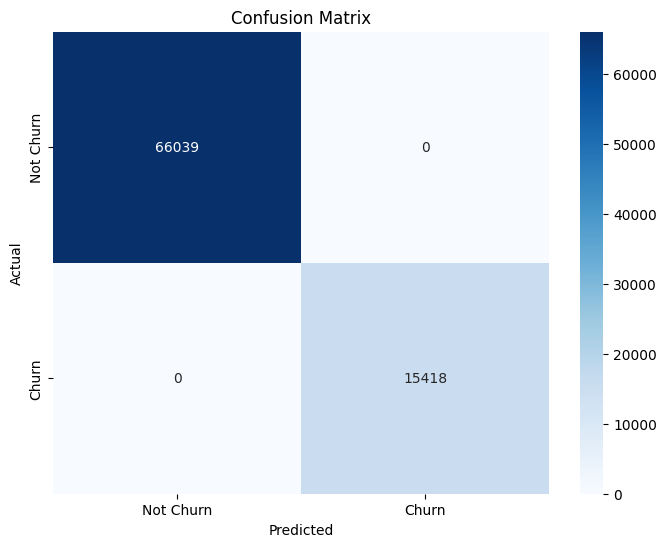

In [9]:
# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Churn", "Churn"], yticklabels=["Not Churn", "Churn"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance

C:\Users\bhawa\AppData\Local\Temp\ipykernel_5960\2584482371.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")


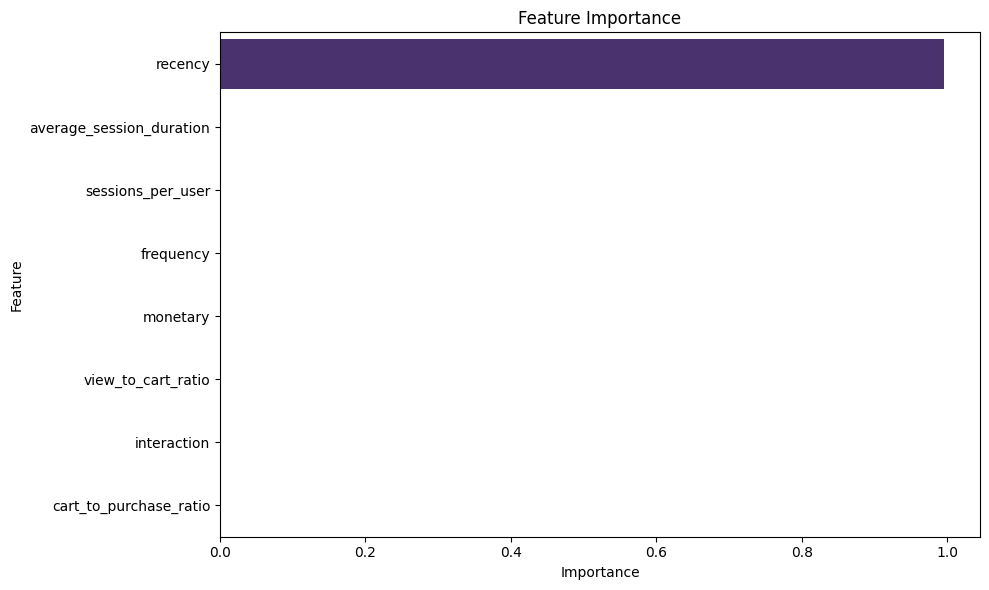

In [10]:
# Plot feature importance
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette="viridis")
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [16]:
import shap

# Initialize the SHAP explainer
explainer = sh.TreeExplainer(model)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary Plot (Global Interpretability)
sh.summary_plot(shap_values[1], X_test, plot_type="bar")

# Detailed Summary Plot
sh.summary_plot(shap_values[1], X_test)

# Individual Prediction Explanation
# Pick a random test instance for interpretation
instance_idx = 0
sh.force_plot(explainer.expected_value[1], shap_values[1][instance_idx], X_test.iloc[instance_idx], matplotlib=True)


ModuleNotFoundError: No module named 'shap'